#    NLP Project - Emotion Classification

## Objective: 
### Develop machine learning models to classify emotions in text samples.

In [3]:
import pandas as pd
df=pd.read_csv("nlp_dataset.csv")
df.head()


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [4]:
df.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [5]:

df.shape

(5937, 2)

In [6]:
df.size

11874

In [7]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [8]:
df.describe(include='all')

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [9]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [10]:
df.duplicated().sum()

0

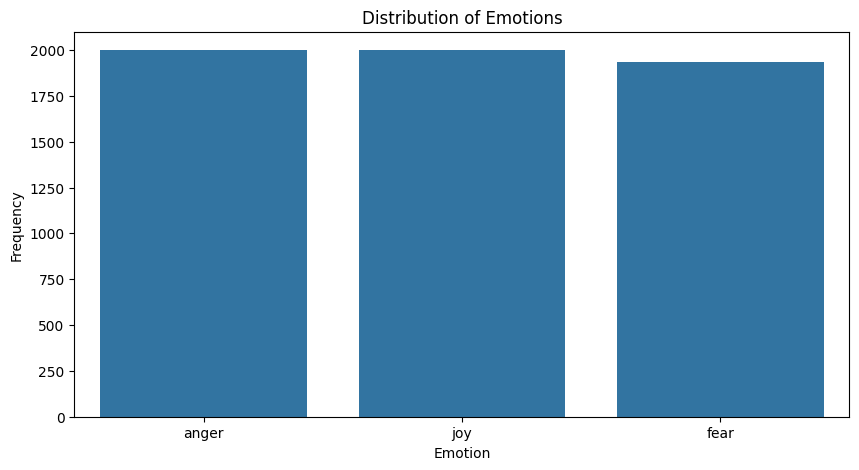

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()


### The "Distribution of Emotions" bar chart that you uploaded displays the frequency of three different emotions: fear, joy, and anger. Here's a brief realization: 1500.



### Joy and Anger: Their frequencies are quite similar, hovering about 2000.

### Fear: This feeling occurs more rarely, with a count of more than 1500.

# Data Cleaning

In [18]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

In [20]:
# Apply text cleaning
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Display the cleaned comments
df[['Comment', 'Cleaned_Comment']]

,Comment,Cleaned_Comment
0,i seriously hate one subject to death but now ...,seriously hate one subject death but now fe...
1,im so full of life i feel appalled,full life feel appalled
2,i sit here to write i start to dig out my feel...,sit here write start dig out feelings and...
3,ive been really angry with r and i feel like a...,ive been really angry with and feel like id...
4,i feel suspicious if there is no one outside l...,feel suspicious there one outside like the...
...,...,...
5932,i begun to feel distressed for you,begun feel distressed for you
5933,i left feeling annoyed and angry thinking that...,left feeling annoyed and angry thinking that ...
5934,i were to ever get married i d have everything...,were ever get married have everything read...
5935,i feel reluctant in applying there because i w...,feel reluctant applying there because want ...


In [28]:
# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))

In [33]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [32]:
df['Processed_Comment'] = df['Cleaned_Comment'].apply(tokenize_and_remove_stopwords)

In [34]:
df['Processed_Comment'] 

0       seriously hate one subject death feel reluctan...
1                                 full life feel appalled
2       sit write start dig feelings think afraid acce...
3       ive really angry feel like idiot trusting firs...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                begun feel distressed
5933    left feeling annoyed angry thinking center stu...
5934    ever get married everything ready offer got to...
5935    feel reluctant applying want able find company...
5936           wanted apologize feel like heartless bitch
Name: Processed_Comment, Length: 5937, dtype: object

In [35]:
# Display the processed dataframe
df[['Comment', 'Processed_Comment']]

,Comment,Processed_Comment
0,i seriously hate one subject to death but now ...,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,full life feel appalled
2,i sit here to write i start to dig out my feel...,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,ive really angry feel like idiot trusting firs...
4,i feel suspicious if there is no one outside l...,feel suspicious one outside like rapture happe...
...,...,...
5932,i begun to feel distressed for you,begun feel distressed
5933,i left feeling annoyed and angry thinking that...,left feeling annoyed angry thinking center stu...
5934,i were to ever get married i d have everything...,ever get married everything ready offer got to...
5935,i feel reluctant in applying there because i w...,feel reluctant applying want able find company...


##### Preprocessing Techniques Used and Their Impact on Model Performance

**Lowercasing**
- **What:** Converts all characters to lowercase.
- **Why:** Standardizes text, reducing the number of unique words (e.g., "Hello" and "hello" are treated as the same word).
- **Impact:** Enhances efficiency by ensuring different cases of the same word are treated equally, improving model performance.

**Removal of Short Words**
- **What:** Eliminates words that are one or two characters long.
- **Why:** Short words often lack significant meaning.
- **Impact:** Reduces noise and focuses on more informative words, thereby enhancing model performance.

**Removal of Punctuation**
- **What:** Strips punctuation marks from text.
- **Why:** Punctuation usually lacks substantial meaning in text analysis.
- **Impact:** Simplifies text, leading to better feature extraction and improved model accuracy.

**Tokenization and Stopword Removal**
- **What:** Breaks text into individual words (tokens) and removes common stopwords (e.g., "the", "is").
- **Why:** Tokenization makes text more manageable, while removing stopwords eliminates words with little semantic value.
- **Impact:** Reduces dimensionality and noise, allowing the model to focus on more informative words, thus improving performance.

## Feature Extraction

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text data
X_count = count_vectorizer.fit_transform(df['Cleaned_Comment'])

# Convert the result to a DataFrame for better readability
X_count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the first few rows of the feature matrix
print(X_count_df.head())

   aac  aaron  abandon  abandoned  abandonment  abbigail  abc  abdomen  \
0    0      0        0          0            0         0    0        0   
1    0      0        0          0            0         0    0        0   
2    0      0        0          0            0         0    0        0   
3    0      0        0          0            0         0    0        0   
4    0      0        0          0            0         0    0        0   

   abelard  abide  ...  zen  zendikar  zero  zest  zhu  zipline  zombies  \
0        0      0  ...    0         0     0     0    0        0        0   
1        0      0  ...    0         0     0     0    0        0        0   
2        0      0  ...    0         0     0     0    0        0        0   
3        0      0  ...    0         0     0     0    0        0        0   
4        0      0  ...    0         0     0     0    0        0        0   

   zone  zonisamide  zumba  
0     0           0      0  
1     0           0      0  
2     0    

## CountVectorizer
**How It Works:** CountVectorizer tokenizes the text and counts the occurrences of each word. In the resulting matrix, each row corresponds to a document, and each column represents a unique word from the corpus. The cell values indicate the count of each word in the respective document.

**Impact:** This method converts text into a numerical format by representing the frequency of each word. While it is a straightforward approach, it doesn't account for the relative importance of words across documents or effectively handle synonyms and word variations.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Comment'])

# Convert the result to a DataFrame for better readability
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the feature matrix
print(X_tfidf_df.head())

   aac  aaron  abandon  abandoned  abandonment  abbigail  abc  abdomen  \
0  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
1  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
2  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
3  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   
4  0.0    0.0      0.0        0.0          0.0       0.0  0.0      0.0   

   abelard  abide  ...  zen  zendikar  zero  zest  zhu  zipline  zombies  \
0      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
1      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
2      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
3      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   
4      0.0    0.0  ...  0.0       0.0   0.0   0.0  0.0      0.0      0.0   

   zone  zonisamide  zumba  
0   0.0         0.0    0.0  
1   0.0         0.0    0.0  
2   0.0    

## TfidfVectorizer

**How It Works:** TfidfVectorizer generates a matrix by weighting each word based on its term frequency (its occurrence in a document) and inverse document frequency (its prevalence across all documents). Initially, it counts the occurrences of each word (similar to CountVectorizer), but then it applies a weighting formula. This formula reduces the weight of common words and increases the weight of rare words, thereby assessing the importance of each word in a document.

**Impact:** This approach enhances text representation by considering the significance of words, giving more weight to informative words and less to frequently occurring but less informative ones.

## Model Development

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
# Transform the text data
X = vectorizer.fit_transform(df['Cleaned_Comment'])
y = df['Emotion']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Naive Bayes model

In [39]:
# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

MultinomialNB()

In [40]:
# Predict on the test set
nb_predictions = nb_model.predict(X_test)
# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)
print("Accuracy:", nb_accuracy)
print("Naive Bayes Model")

Accuracy: 0.8945005611672279
Naive Bayes Model


In [41]:
print("Classification Report:\n", nb_report)

Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.93      0.90       600
        fear       0.92      0.86      0.89       614
         joy       0.89      0.89      0.89       568

    accuracy                           0.89      1782
   macro avg       0.90      0.89      0.89      1782
weighted avg       0.90      0.89      0.89      1782



## SVM model

In [42]:
# Initialize SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

SVC()

In [43]:
# Predict on the test set
svm_predictions = svm_model.predict(X_test)
# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)
print("Support Vector Machine Model")
print("Accuracy:", svm_accuracy)

Support Vector Machine Model
Accuracy: 0.8984287317620651


In [44]:
print("Classification Report:\n", svm_report)

Classification Report:
               precision    recall  f1-score   support

       anger       0.91      0.89      0.90       600
        fear       0.95      0.85      0.90       614
         joy       0.84      0.96      0.90       568

    accuracy                           0.90      1782
   macro avg       0.90      0.90      0.90      1782
weighted avg       0.90      0.90      0.90      1782



## ### Model Comparison

To compare the Naive Bayes and Support Vector Machine (SVM) models, we use the following metrics:

**Accuracy**

- **Naive Bayes Model:** 89.45%
- **SVM Model:** 89.84%

**Explanation:** Accuracy measures the proportion of correctly classified instances out of the total instances. The SVM model has a slightly higher accuracy, indicating it correctly classifies a marginally higher percentage of instances compared to the Naive Bayes model.

**F1-Score**

- **Naive Bayes Model:**
  - Anger: 0.90
  - Fear: 0.89
  - Joy: 0.89
  - Macro Average: 0.89
  - Weighted Average: 0.89

- **SVM Model:**
  - Anger: 0.90
  - Fear: 0.90
  - Joy: 0.90
  - Macro Average: 0.90
  - Weighted Average: 0.90

**Explanation:** The F1-Score balances precision and recall, providing a single metric to evaluate model performance. The SVM model has a slightly better F1-Score across all classes and averages compared to the Naive Bayes model, indicating it has a more balanced performance in terms of precision and recall.